a)

/home/radbrad/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/radbrad/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/radbrad/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/radbrad/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:5

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 49000 samples, validate on 1000 samples
Epoch 1/100
49000/49000 [==============================] - 6s 119us/sample - loss: 4.5395 - acc: 0.0196 - val_loss: 4.5070 - val_acc: 0.0220
Epoch 2/100
49000/49000 [==============================] - 4s 86us/sample - loss: 4.4804 - acc: 0.0260 - val_loss: 4.4767 - val_acc: 0.0280
Epoch 3/100
49000/49000 [==============================] - 4s 85us/sample - loss: 4.4630 - acc: 0.0278 - val_loss: 4.5300 - val_acc: 0.0280
Epoch 4/100
49000/49000 [==============================] - 5s 95us/sample - loss: 4.4539 - acc: 0.0301 - val_loss: 4.4881 - val_acc: 0.0250
Epoch 5/100
49000/49000 [==============================] - 5s 95us/sample - loss: 4.4462 - acc: 0.0299 - val_loss: 4.4739 - val_acc: 0.0200
Epoch 6/100
49000/49000 [==============================] - 5s 94us/sample - loss: 4.4395 - acc: 0.0326 - val_loss: 4.4553 - val_acc:

49000/49000 [==============================] - 5s 93us/sample - loss: 4.1732 - acc: 0.0645 - val_loss: 4.4825 - val_acc: 0.0350
Epoch 57/100
49000/49000 [==============================] - 5s 93us/sample - loss: 4.1666 - acc: 0.0663 - val_loss: 4.4957 - val_acc: 0.0320
Epoch 58/100
49000/49000 [==============================] - 4s 86us/sample - loss: 4.1621 - acc: 0.0677 - val_loss: 4.4947 - val_acc: 0.0320
Epoch 59/100
49000/49000 [==============================] - 4s 83us/sample - loss: 4.1552 - acc: 0.0686 - val_loss: 4.4990 - val_acc: 0.0300
Epoch 60/100
49000/49000 [==============================] - 4s 82us/sample - loss: 4.1482 - acc: 0.0684 - val_loss: 4.5217 - val_acc: 0.0290
Epoch 61/100
49000/49000 [==============================] - 4s 85us/sample - loss: 4.1418 - acc: 0.0699 - val_loss: 4.5398 - val_acc: 0.0400
Epoch 62/100
49000/49000 [==============================] - 4s 86us/sample - loss: 4.1347 - acc: 0.0725 - val_loss: 4.5266 - val_acc: 0.0370
Epoch 63/100
49000/49000 [

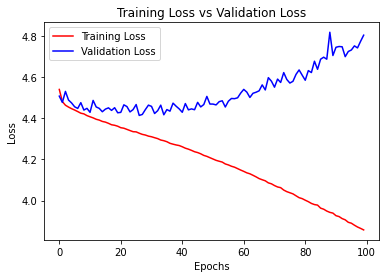

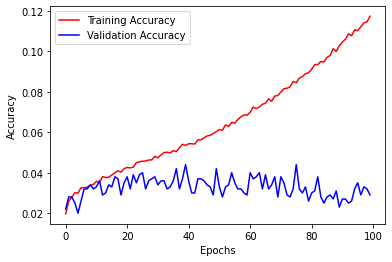

In [1]:
import numpy as np
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i,sequence in enumerate(sequences):
        results[i,sequence] = 1
    return results

if "__main__" == __name__:

    # load data
    np_load_old = np.load
    np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)
    (X_train, y_train), (X_test, y_test) = cifar100.load_data(label_mode='fine')
    np.load = np_load_old

    X_train = vectorize_sequences(X_train)
    X_test = vectorize_sequences(X_test)
    one_hot_y_train = to_categorical(y_train)
    one_hot_y_test = to_categorical(y_test)

    X_val = X_train[:1000]
    partial_X_train = X_train[1000:]
    y_val = one_hot_y_train[:1000]
    partial_y_train = one_hot_y_train[1000:]

    model = Sequential()
    #TODO: input layer node count may be incorrect
    model.add(Dense(100, activation='relu'))
    model.add(Dense(500, activation='relu'))
    model.add(Dense(200, activation='relu'))
    model.add(Dense(100, activation='softmax'))

    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(partial_X_train, partial_y_train, epochs=100, batch_size=512, validation_data=(X_val, y_val))

    loss = history.history['loss']
    val_loss = history.history['val_loss']
    acc = history.history['acc']
    val_acc = history.history['val_acc']

    plt.plot(range(100), loss, 'r', label='Training Loss')
    plt.plot(range(100), val_loss, 'b', label='Validation Loss')
    plt.title('Training Loss vs Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    plt.clf()
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    plt.plot(range(100), acc,'r',label='Training Accuracy')
    plt.plot(range(100), val_acc, 'b', label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    result_data = [] 

b)

c)

d)

e)